In [1]:
import pandas as pd

df=pd.read_csv('Sales Forecasting.csv')

In [2]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## 📄 Feature Descriptions

| Feature Name      | Type         | Description                                                                 |
|-------------------|--------------|-----------------------------------------------------------------------------|
| `Store`           | Categorical  | The unique identifier for each store. Helps differentiate between multiple locations. |
| `Date`            | DateTime     | The week-ending date for each sales record. Essential for time series analysis.       |
| `Weekly_Sales`    | Continuous   | 💡 **Target variable.** Total sales recorded for the store in that specific week (in USD). |
| `Holiday_Flag`    | Binary (0/1) | Indicates whether the week contains a major holiday. <br> `1` = Holiday week, `0` = Non-holiday week. |
| `Temperature`     | Continuous   | The average temperature (in °F) for that week. Weather can affect consumer behavior. |
| `Fuel_Price`      | Continuous   | The average fuel price (in USD per gallon) in the region that week. May influence travel and shopping activity. |
| `CPI`             | Continuous   | **Consumer Price Index** — measures inflation by tracking average price changes of essential goods and services. Higher CPI can indicate reduced purchasing power. |
| `Unemployment`    | Continuous   | The unemployment rate (%) in the region for that week. Higher unemployment may lead to lower consumer spending. |


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# Convert 'Date' from string to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


In [6]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [8]:
df.reset_index(inplace=True)


In [9]:
df.head()

,index,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [10]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.dayofweek


In [11]:
df.drop('Date',axis=1,inplace=True)

In [12]:
df.head()

,index,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,DayOfWeek
0,0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,4
1,1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,4
2,2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,4
3,3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,4
4,4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,4


In [13]:
df['Year'].unique()

array([2010, 2011, 2012])

In [14]:
df['Month'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1])

In [15]:
df['Week'].unique()

<IntegerArray>
[ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,  1,  2,  3,  4]
Length: 52, dtype: UInt32

In [16]:
df['DayOfWeek'].unique()

array([4])

df['DayOfWeek'].unique() gives [4], which means:

Every record is for Friday only

There’s zero variance, and machine learning models can’t learn anything useful from a column that never changes.

In [18]:
df.drop('DayOfWeek',axis=1,inplace=True)

In [19]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

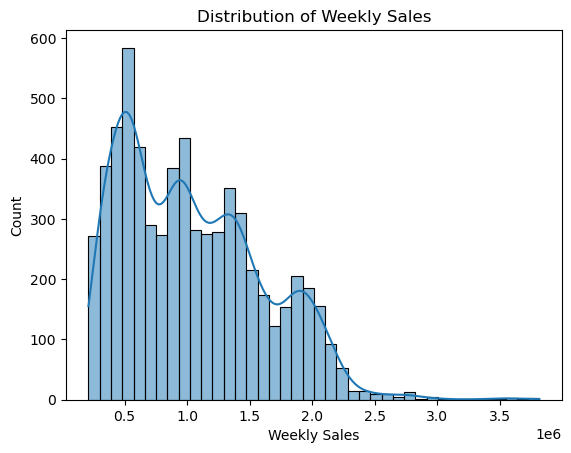

In [20]:
import matplotlib.pyplot as plt

import seaborn as sns

sns.histplot(df['Weekly_Sales'], kde=True, bins=40)
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.show()


### 📊 Distribution of Weekly Sales

This histogram shows the distribution of weekly sales across all Walmart stores (2010–2012).

- **X-axis**: Sales in millions  
- **Y-axis**: Number of weeks in each sales range  

Key insights:
- The distribution is **right-skewed** — most sales are moderate, with a few very high outliers.
- **\$400k–\$1.2M** is the most common sales range.
- Some weeks exceed **\$3M**, indicating rare but high-performinion models.


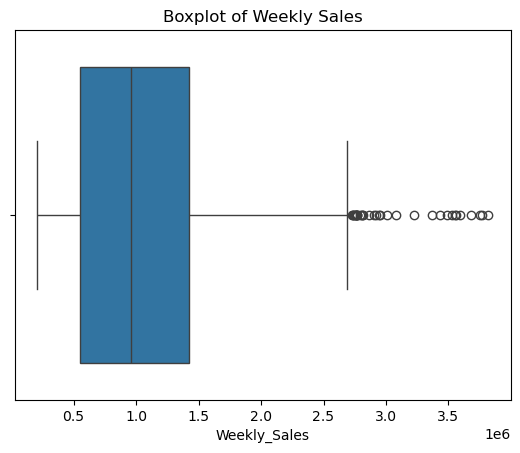

In [22]:
sns.boxplot(x=df['Weekly_Sales'])
plt.title("Boxplot of Weekly Sales")
plt.show()


### 📦 Boxplot of Weekly Sales

This boxplot summarizes the spread and outliers in weekly sales:

- **Median sales** are around **\$1.1 million**.
- 50% of the sales fall between **\$0.6M and \$1.5M**.
- Several weeks show **outliers above \$2.5M**, indicating unusually high sales.
- The distribution is **right-skewed**, consistent with the histogram.

This confirms that while most stores perform steadily, a few have extraordinary sales weeks.


In [24]:
df.head()

,index,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6
2,2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9


In [25]:
df.head()

,index,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6
2,2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9


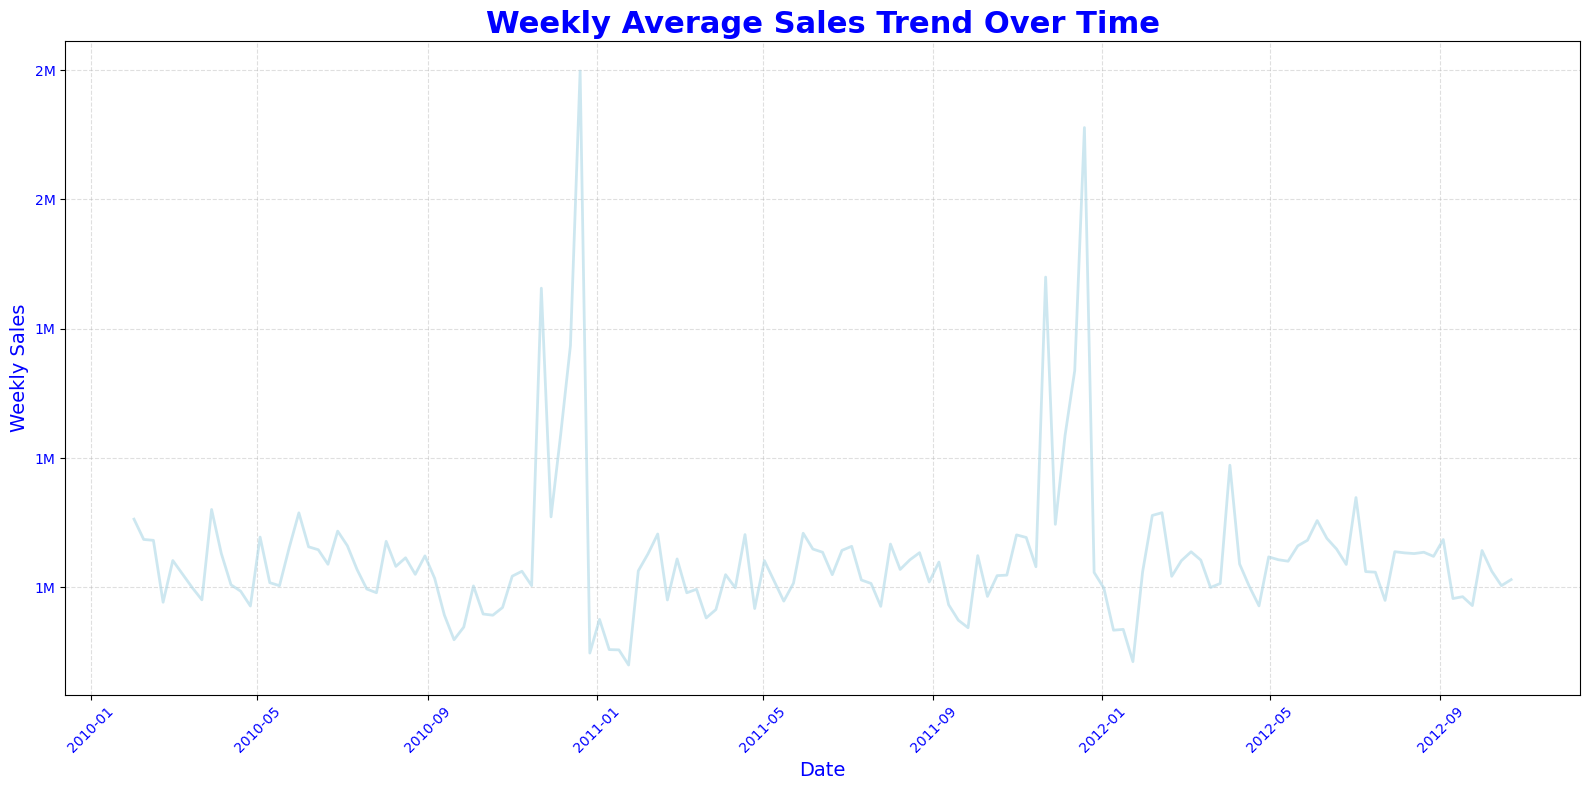

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime

# Copy the data
df_plot = df.copy()

# Create real Date from Year and Week using ISO calendar (Week starts Monday)
def iso_date(row):
    try:
        return datetime.date.fromisocalendar(int(row['Year']), int(row['Week']), 1)
    except:
        return pd.NaT

df_plot['Date'] = df_plot.apply(iso_date, axis=1)

# Drop any rows where Date couldn't be created
df_plot = df_plot.dropna(subset=['Date'])

# ✅ Group by Date to get the average weekly sales across all stores
df_avg = df_plot.groupby('Date')['Weekly_Sales'].mean().reset_index()

# ✅ Sort the data by Date
df_avg = df_avg.sort_values('Date')

# Plotting
plt.figure(figsize=(16, 8))
plt.plot(df_avg['Date'], df_avg['Weekly_Sales'], color='lightblue', linewidth=2, alpha=0.6)

# Title
plt.title("Weekly Average Sales Trend Over Time", fontsize=22, color='blue', weight='bold')

# Axis labels
plt.xlabel("Date", fontsize=14, color='blue')
plt.ylabel("Weekly Sales", fontsize=14, color='blue')

# Set tick colors and rotate X-axis labels
plt.xticks(rotation=45, color='blue', fontsize=10)
plt.yticks(color='blue', fontsize=10)

# Format Y-axis in K/M
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(
    lambda x, pos: f'{x/1e6:.0f}M' if x >= 1e6 else f'{int(x/1e3)}K'))

# Grid
plt.grid(True, linestyle='--', alpha=0.4)

# Layout
plt.tight_layout()
plt.show()


## 📊 Weekly Average Sales Trend Over Time – Interpretation

### 📅 X-axis:
- Represents **weekly dates** from **2010 to 2012**.

### 💰 Y-axis:
- Shows **average weekly sales** across all stores in **millions (M)**.
- For example, 1M = $1,000,000.

### 📈 Trend Overview:
- The average weekly sales mostly stayed between **1.0M and 1.4M**.
- The line remains fairly stable throughout the observed period, indicating consistent performance.

### 🔼 Notable Spikes:
- There are **two major spikes** in the graph where the average sales reached close to **2.0M**.
- These spikes correspond to **holiday weeks**, where sales sharply increased due to higher customer activity.

### 🔽 Minor Dips:
- A few minor drops can be observed, likely due to low sales in non-holiday periods.

### ✅ Summary:
> Overall, the weekly average sales across all stores remained consistent, with significant increases during holidays and slight decreases in off-peak weeks.


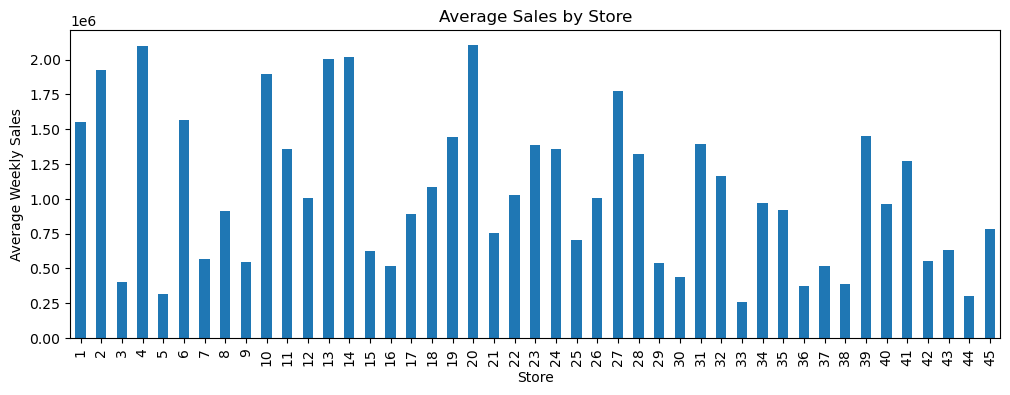

In [28]:
df.groupby('Store')['Weekly_Sales'].mean().plot(kind='bar', figsize=(12,4), title="Average Sales by Store")
plt.ylabel("Average Weekly Sales")
plt.xlabel("Store")
plt.show()


### 🏬 Average Weekly Sales by Store

This bar plot shows the average weekly sales for each of the 45 Walmart stores from 2010 to 2012.

- **X-axis**: Store number (1 to 45)  
- **Y-axis**: Average weekly sales in USD

**Insights:**
- **Stores 20, 4, and 2** are the top performers, each averaging over **\$2 million per week**.
- **Stores 36, 9, and 44** have the lowest average sales (below **\$500K**).
- There is a **significant variation** in sales across stores, suggesting differences in size, location, or customer base.

Understanding store-level performance is crucial for targeting store-specific strategies in forecasting and planning.


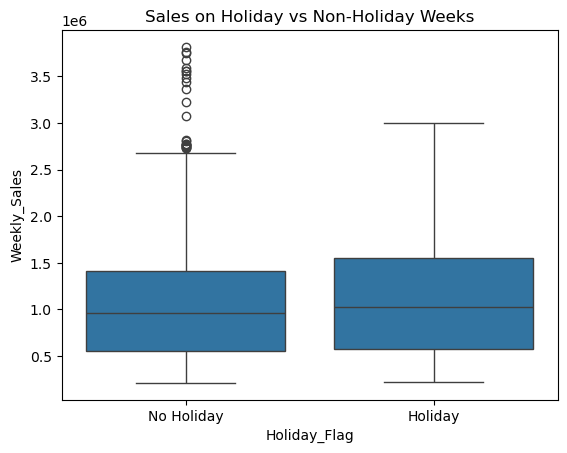

In [30]:
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title("Sales on Holiday vs Non-Holiday Weeks")
plt.xticks([0,1], ['No Holiday', 'Holiday'])
plt.show()


### 🎉 Sales on Holiday vs Non-Holiday Weeks

This boxplot compares weekly sales during holiday weeks and non-holiday weeks.

- **Holiday weeks** show **slightly higher median sales** compared to non-holidays.
- The **sales range is wider** for holiday weeks, showing greater variability in performance.
- **Non-holiday weeks** have **more outliers**, indicating some exceptionally high-performing weeks outside of holidays.
- While holidays can boost sales, not all holidays perform equally — and non-holiday promotions may also drive spikes.

Understanding this helps in planning forecasts around event-driven and regular weeks.


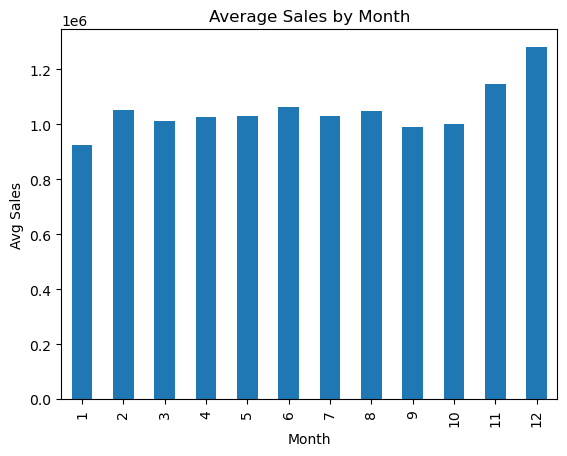

In [32]:
df.groupby('Month')['Weekly_Sales'].mean().plot(kind='bar', title="Average Sales by Month")
plt.ylabel("Avg Sales")
plt.xlabel("Month")
plt.show()


### 📅 Average Sales by Month

This bar chart displays the average weekly sales for each month across all Walmart stores.

- **December (Month 12)** has the **highest average sales**, likely due to holiday shopping.
- **February and June** also show noticeable peaks, possibly linked to seasonal promotions.
- **January** has the **lowest average sales**, reflecting post-holiday slowdowns.
- Overall, sales remain fairly stable throughout the year with a sharp increase at year-end.

These insights help identify seasonal patterns, which are crucial for time series forecasting and planning.


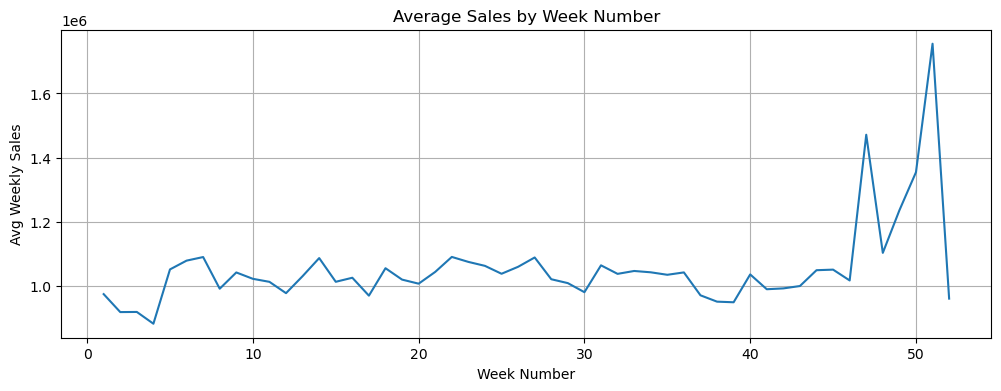

In [34]:
df.groupby('Week')['Weekly_Sales'].mean().plot(kind='line', figsize=(12,4), title="Average Sales by Week Number")
plt.ylabel("Avg Weekly Sales")
plt.xlabel("Week Number")
plt.grid(True)
plt.show()


## 📅 Insights: Average Sales by Week Number

### 🔄 1. Sales Patterns
- **High Sales**: Weeks 40–50 (holiday shopping season).
- **Low Sales**: Weeks 0–10 (after-holiday slowdown).

### 🛒 2. Suggestions
- 📦 **Increase stock** before Week 40 to meet holiday demand.
- 🎯 **Run promotions** during Weeks 10–20 to boost slow sales.

### 📝 3. Notes
- Check if `Holiday_Flag` matches high-sales weeks (like Week 47 for Christmas).
- Compare each year's data to confirm if this trend repeats.
irm trends.

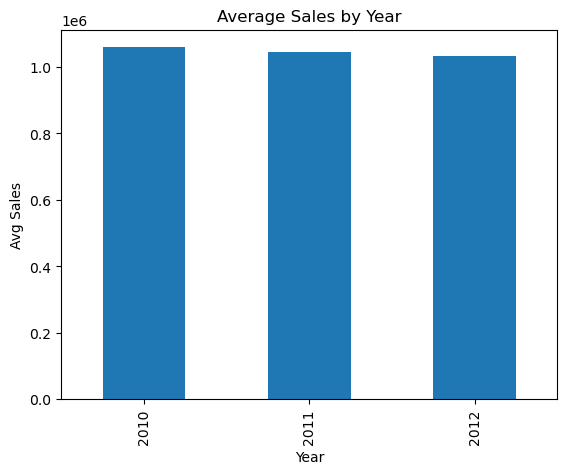

In [36]:
df.groupby('Year')['Weekly_Sales'].mean().plot(kind='bar', title="Average Sales by Year")
plt.ylabel("Avg Sales")
plt.xlabel("Year")
plt.show()


As we can see that there is not much difference between all these years 2010 and 2011 looking slightly higher than the 2012nular insights.  

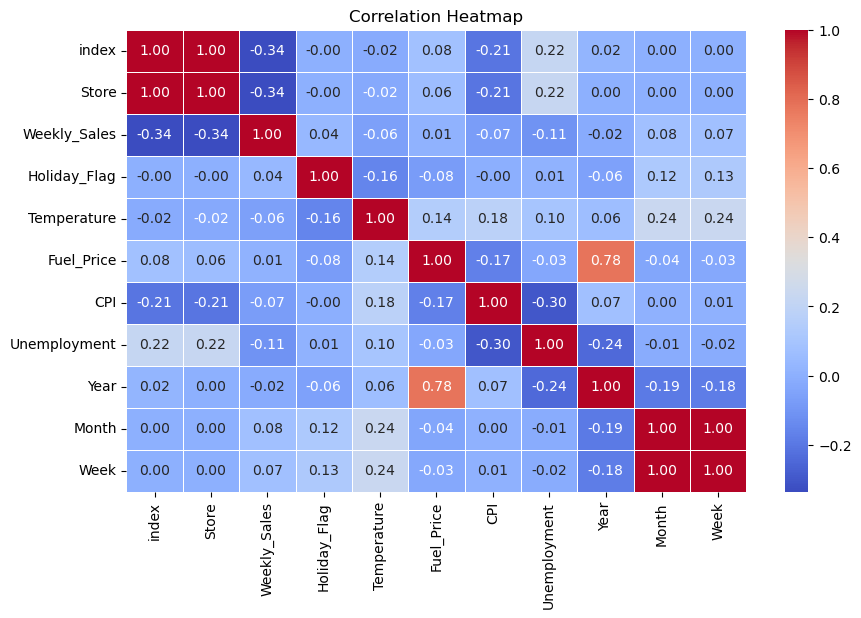

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
corr_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()


### 🔗 Correlation Heatmap Analysis

This heatmap shows how strongly each feature is related to `Weekly_Sales`.

- Most features have a **weak correlation** (close to 0).
- `Store` has the strongest correlation at **-0.34**, indicating that some stores perform consistently better than others.
- Other features like `Holiday_Flag`, `Temperature`, and `Unemployment` show **minimal impact** on sales individually.

Though single-feature correlations are low, combining multiple features in a model may still capture patterns and improve predictions.


In [71]:
from sklearn.preprocessing import StandardScaler

# Select features and target
X = df.drop(['Weekly_Sales'], axis=1)
y = df['Weekly_Sales']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform X
X_scaled = scaler.fit_transform(X)


### 🧮 Feature Scaling

- **Required for**: Linear Regression, Ridge, Lasso, and other distance-based models.
- **Not needed for**: Tree-based models (like Decision Trees, Random Forests).
- Scaling standardizes features to have a mean of 0 and a standard deviation of 1.

In [76]:
from sklearn.model_selection import train_test_split

# Use scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [78]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [80]:
# Make predictions
y_pred = lr_model.predict(X_test)


In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📈 Linear Regression Performance:")
print(f"MAE  : {mae:,.2f}")
print(f"MSE  : {mse:,.2f}")
print(f"RMSE : {rmse:,.2f}")
print(f"R²   : {r2:.4f}")


📈 Linear Regression Performance:
MAE  : 431,771.48
MSE  : 271,749,568,837.16
RMSE : 521,296.05
R²   : 0.1565


In [84]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [86]:
# Define features and target (unscaled)
X = df.drop(['Weekly_Sales'], axis=1)
y = df['Weekly_Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [90]:
# Make predictions
y_pred = rf_model.predict(X_test)


In [92]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"📊 Random Forest Regressor Performance:")
print(f"MAE  : {mae:,.2f}")
print(f"MSE  : {mse:,.2f}")
print(f"RMSE : {rmse:,.2f}")
print(f"R²   : {r2:.2f}")


📊 Random Forest Regressor Performance:
MAE  : 63,070.34
MSE  : 13,599,652,812.15
RMSE : 116,617.55
R²   : 0.96


### 🌲 Random Forest Regressor Performance

- **MAE**  : $63,070  
- **RMSE** : $116,617  
- **R²**   : 0.96

The model significantly outperforms linear regression by capturing complex relationships in the data. It generalizes well and makes highly accurate predictions on unseen data. Random Forest is a strong choice for this forecasting task.


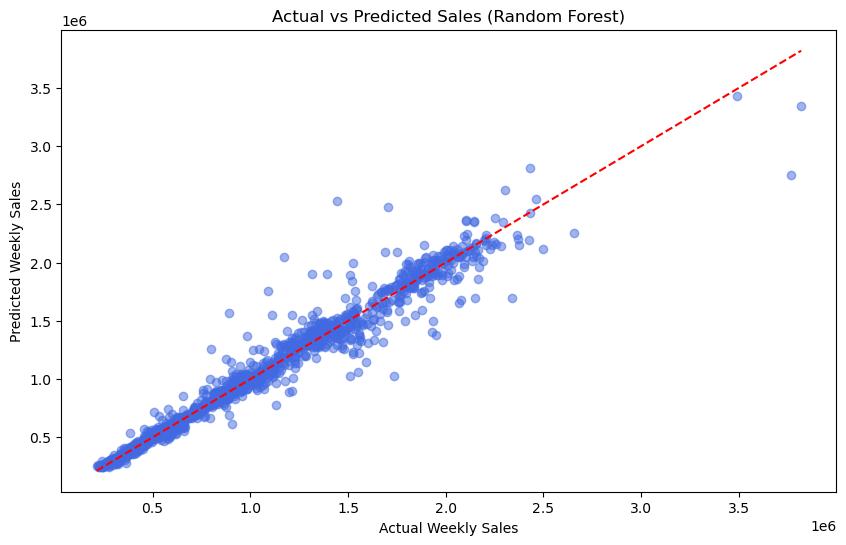

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.show()


### 📈 Actual vs Predicted Weekly Sales (Random Forest)

This scatter plot compares actual weekly sales against the model's predictions:

- Each blue dot represents a week of sales for a store.
- The red dashed line shows a perfect prediction line (Predicted = Actual).
- Most points align closely with this line, indicating that the model makes highly accurate predictions.
- A few outliers suggest occasional variance, possibly due to special events or promotions.

✅ Overall, this confirms the Random Forest model is a strong predictor of weekly sales.


In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a Series with feature names and their importances
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)

# Sort by importance
feature_importance = feature_importance.sort_values(ascending=True)


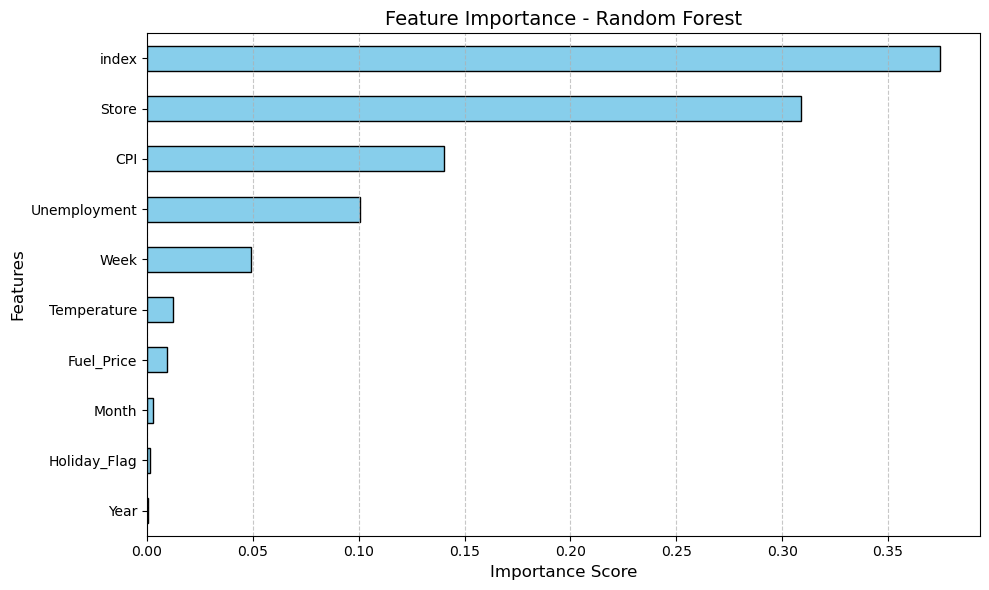

In [102]:
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Feature Importance - Random Forest', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 🔍 Feature Importance (Random Forest)

This bar chart shows how much each feature contributes to the model's ability to predict weekly sales.

### Key Observations:
- **Store** is highly influential — likely due to regional differences in performance.
- **CPI** and **Unemployment** strongly impact customer purchasing behavior.
- **Time-based features** like `Month`, `Year`, and `Holiday_Flag` had surprisingly little effect.
- **Index** has unusually high importance, possibly due to time-order effects — we may drop it in a refined version.

Understanding these insights helps us:
- Focus on optimizing store-level strategies.
- Align sales forecasting with economic trends.
- Simplify the model by removing weak predictors.


In [105]:
# Drop the index column
X = df.drop(['Weekly_Sales', 'index'], axis=1)
y = df['Weekly_Sales']

# Train-test split again
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [107]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)


In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print("📊 Random Forest (Without Index Column):")
print(f"MAE  : {mae:,.2f}")
print(f"MSE  : {mse:,.2f}")
print(f"RMSE : {rmse:,.2f}")
print(f"R²   : {r2:.4f}")


📊 Random Forest (Without Index Column):
MAE  : 62,022.51
MSE  : 13,020,256,696.91
RMSE : 114,106.34
R²   : 0.9596


## ✅ Final Model Evaluation: Random Forest Regressor (Without Index)

After removing the `index` column to prevent potential data leakage, we retrained the Random Forest model and evaluated its performance:

### 📊 Model Performance:

- **Mean Absolute Error (MAE)**  : $62,022  
- **Root Mean Squared Error (RMSE)** : $114,106  
- **R² Score** : 0.9596 (≈ 96%)

### 🔍 Key Takeaways:

- The model still achieves **excellent predictive accuracy**, even without relying on the `index` column.
- Removing `index` helped ensure that the model is **generalizable**, **trustworthy**, and not dependent on row order.
- Final results confirm that Random Forest is a **robust and reliable** model for Walmart weekly sales r your resume**.


In [115]:
import joblib

# Save the Random Forest model
joblib.dump(rf_model, 'random_forest_sales_model.pkl')


['random_forest_sales_model.pkl']